<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  SVD en reconocimiento facial

En este caso-taller vamos a aplicar SVD para hacer reconocimiento facial. Esta aplicación se conoce como caras propias, o eigenfaces en inglés, y si bien es una forma rudimentaria de reconocimiento facial sus resultados pueden ser muy interesantes. El problema de las caras propias fue estudiado por primera vez por Sirovich y Kirby en 1987, ampliado en 1990 y su aplicación al reconocimiento facial automatizado fue presentado por Turk and Pentland en 1991.

En este taller vamos a utilizar la base de datos conocida como Caras Etiquetadas en la Naturaleza, o Labeled Faces in the Wild (LFW). Esta base es provista por la Universidad de Massachusetts Amherst para que la comunidad académica la utilice para la evaluación de modelos predictivos.

La base contiene más de 13.000 imágenes de rostros recopilados de la web y cada cara ha sido etiquetada con el nombre de la persona representada. Un subconjunto de 1.680 de las personas fotografiadas tienen dos o más fotos distintas en el conjunto de datos. 


 
#### Referencias

- G. B. Huang,  M. Ramesh, T. Berg, and E. Learned-Miller. Labeled Faces in the Wild: A Database for Studying Face Recognition in Unconstrained Environments. University of Massachusetts, Amherst, Technical Report 07-49, October, 2007.

- M. Kirby and L. Sirovich. Application of the Karhunen-Loève procedure for the characterization of human faces. IEEE Transactions on Pattern Analysis and Machine Intelligence (PAMI), 12(1):103–108, 1990.

- L. Sirovich and M. Kirby. A low-dimensional procedure for the characterization of human faces. Journal of the Optical Society of America A, 4(3):519–524, 1987

- M. Turk and A. Pentland. Eigenfaces for recognition. Journal of Cognitive Neuroscience, 3(1):71–86, 1991.

## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "Revisión por el compañero".

4. El archivo entregado debe poder ser ejecutado localmente por los pares. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos  en la misma ruta de acceso del cuaderno, por ejemplo: `data`.

## Desarrollo


### 1. Carga de datos 

Los datos pueden ser descargados directamente utilizando la librería `scikit-learn`, para ello cargue la base utilizando la función `fetch_lfw_people`. Esta función verificará si los datos están disponibles. De no estarlo, `scikit-learn` los descargará automáticamente desde el sitio web de la Universidad de Massachusetts. Descargue las imágenes para individuos que tengan al menos 25 imágenes y guárdelos en una carpeta llamada `data` usando esta función.

In [2]:
# Utilice este espacio para escribir el código.
from sklearn.datasets import fetch_lfw_people
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
import sklearn
print(sklearn.__version__)

1.4.2


In [4]:
from sklearn.datasets import clear_data_home
# Limpiar el caché
# clear_data_home()

In [5]:
# Opción_1: Carga de datos según la recomendación del taller 
# Start the timer
start_time = time.time()
#lfw_people = fetch_lfw_people(min_faces_per_person=25, data_home="data" )
# End the timer
end_time = time.time()

# Calculate elapsed time
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.2f} seconds")

Elapsed time: 0.00 seconds


In [6]:
# Opción_2: Carga de datos directa a un objeto de python
# Start the timer
start_time = time.time()

#lfw_people = fetch_lfw_people(min_faces_per_person=25)
# End the timer
end_time = time.time()

# Calculate elapsed time
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.2f} seconds")

Elapsed time: 0.00 seconds


In [7]:
import os
import joblib
import time

# Start the timer
start_time = time.time()

# Define the directory and ensure it exists
output_dir = 'data'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Define the path to save the Bunch object within the 'data' directory
output_file = os.path.join(output_dir, 'lfw_people_bunch.pkl')

# Check if the file already exists
if os.path.exists(output_file):
    print(f"File '{output_file}' already exists.")
    overwrite = input("Do you want to overwrite the file? (y/n): ").strip().lower()
    if overwrite != 'y':
         print("Save operation aborted.")
    else:
        lfw_people = fetch_lfw_people(min_faces_per_person=25)
        joblib.dump(lfw_people, output_file)
else:
    # Save the Bunch object as a single file using joblib
    lfw_people = fetch_lfw_people(min_faces_per_person=25)
    joblib.dump(lfw_people, output_file)
    print(f"The Bunch object has been saved as '{output_file}'.")

# End the timer
end_time = time.time()
# Calculate elapsed time
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.2f} seconds")    

The Bunch object has been saved as 'data/lfw_people_bunch.pkl'.
Elapsed time: 0.12 seconds


In [8]:
# Load the Bunch object
lfw_people = joblib.load('data/lfw_people_bunch.pkl')
type(lfw_people)

sklearn.utils._bunch.Bunch

#### Procedimiento, Analisis y conclusiones

En primera instancia se hace la carga de datos siguiendo las instrucciones del taller. Sin embargo, al hacerlo de esta manera se toma 42.50 segundos.<br>
Una segunda opción, es cargar los datos a una estructura en el notebook (0.14 seg), lo cual es suficiente para desarrollar todos los puntos del taller.<br>
Finalmente,  una opcion intermedia, es salvar los datos en un objeto tipo bunch.pkl en un folder llamado data la primera vez que se corre el notebook (0.16 seg), y dar la opción a quien lo corre de sobre escribirlo la siguiente vez. En este caso los datos se cargan al objeto bunch lfw_people desde data. <br>
Esta es la opción seleccionada personalmente, y por esta razon las opciones 1 y 2 están comentadas.  

### 2.  Análisis preliminar 

Describa los contenidos de la base, tenga en cuenta que debe detallar los elementos, la dimensión de la base, y la dimensión de las imágenes. 

In [9]:
# Utilice este espacio para escribir el código.
print("Tipo de Estructura de datos: ", type(lfw_people))
print("Llaves en la estructura de datos: ", lfw_people.keys())

Tipo de Estructura de datos:  <class 'sklearn.utils._bunch.Bunch'>
Llaves en la estructura de datos:  dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])


In [10]:
description = lfw_people['DESCR']
print("Descripción de los datos: \n", description)

Descripción de los datos: 
 .. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is


In [11]:
print("Numero de imagenes: ", lfw_people.data.shape[0])
print("Numero de pixeles por imagen: ", lfw_people.data.shape[1])
h, w = lfw_people.images[0].shape
print("Dimension de cada imagen (alto x ancho) en pixeles: ", h, "x", w)

Numero de imagenes:  2588
Numero de pixeles por imagen:  2914
Dimension de cada imagen (alto x ancho) en pixeles:  62 x 47


In [12]:
target_names = lfw_people.target_names
print("Numero de personajes en la base: ", len(target_names))

Numero de personajes en la base:  42


In [13]:
print("Primeros 5 personajes en la base:")
for name in target_names[:5]:
   print(name)

Primeros 5 personajes en la base:
Alejandro Toledo
Alvaro Uribe
Andre Agassi
Ariel Sharon
Arnold Schwarzenegger


In [14]:
import pandas as pd
# Get target names and their corresponding labels
target_labels = lfw_people.target

# Count the number of images per target name
unique, counts = np.unique(target_labels, return_counts=True)
name_counts = dict(zip(target_names[unique], counts))

# Create a DataFrame to display the results
df = pd.DataFrame(list(name_counts.items()), columns=['Name', 'Number of Images'])
df.head(3)

,Name,Number of Images
0,Alejandro Toledo,39
1,Alvaro Uribe,35
2,Andre Agassi,36


In [15]:
df.describe()

,Number of Images
count,42.000000
mean,61.619048
std,83.618749
min,25.000000
25%,31.000000
50%,38.000000
75%,52.000000
max,530.000000


##### Procedimiento, análisis y conclusiones:
Como se describio en el primer punto la estructura de datos corresponde al tipo bunch, similar a un diccionario. En este caso particular las llaves son: <br>
'data', 'images', 'target', 'target_names' y 'DESCR'. data e images son matrices que incluyen la misma información, la primera en forma aplanada, y la segunda en su forma original. target incluye las etiquetas de los individuos includos en el data set, y target_names sus nombres. Por último, en DESCR se hace una descripcion del origen de los datos (“Labeled Faces in the Wild” UMass. Amherst), y sus caraterísticas <br>
En total, luego de correr algunas lineas de codigo basico incluyendo shape, len y creando un dataframe (df) simple se obtiene la siguiente información general de los datos: <br>
2588 imagenes de 62x47 pixeles cada una. <br>
Se incluyen imagenes de 42 individuos (aquellos con mas de 25 imagenes en los datos originales)
El promedio de imagenes por personaje es 61.61, con una desviacion estandar de 83.61. El minimo de imagenes es 25 y el maximo 530. De los primeros datos listados se observa que la data incluye reconocidos personajes del ambito politico y deportivo a nivel mundial.  

A continuación responda las siguientes preguntas: 

- ¿Cuál es la distribución de imágenes por individuos? 

In [16]:
from tabulate import tabulate
table_data = [(name, count) for name, count in name_counts.items()]
headers = ["Name", "Number of Images"]
print(tabulate(table_data, headers=headers, tablefmt="fancy_grid"))

╒═══════════════════════════╤════════════════════╕
│ Name                      │   Number of Images │
╞═══════════════════════════╪════════════════════╡
│ Alejandro Toledo          │                 39 │
├───────────────────────────┼────────────────────┤
│ Alvaro Uribe              │                 35 │
├───────────────────────────┼────────────────────┤
│ Andre Agassi              │                 36 │
├───────────────────────────┼────────────────────┤
│ Ariel Sharon              │                 77 │
├───────────────────────────┼────────────────────┤
│ Arnold Schwarzenegger     │                 42 │
├───────────────────────────┼────────────────────┤
│ Bill Clinton              │                 29 │
├───────────────────────────┼────────────────────┤
│ Colin Powell              │                236 │
├───────────────────────────┼────────────────────┤
│ David Beckham             │                 31 │
├───────────────────────────┼────────────────────┤
│ Donald Rumsfeld           │  

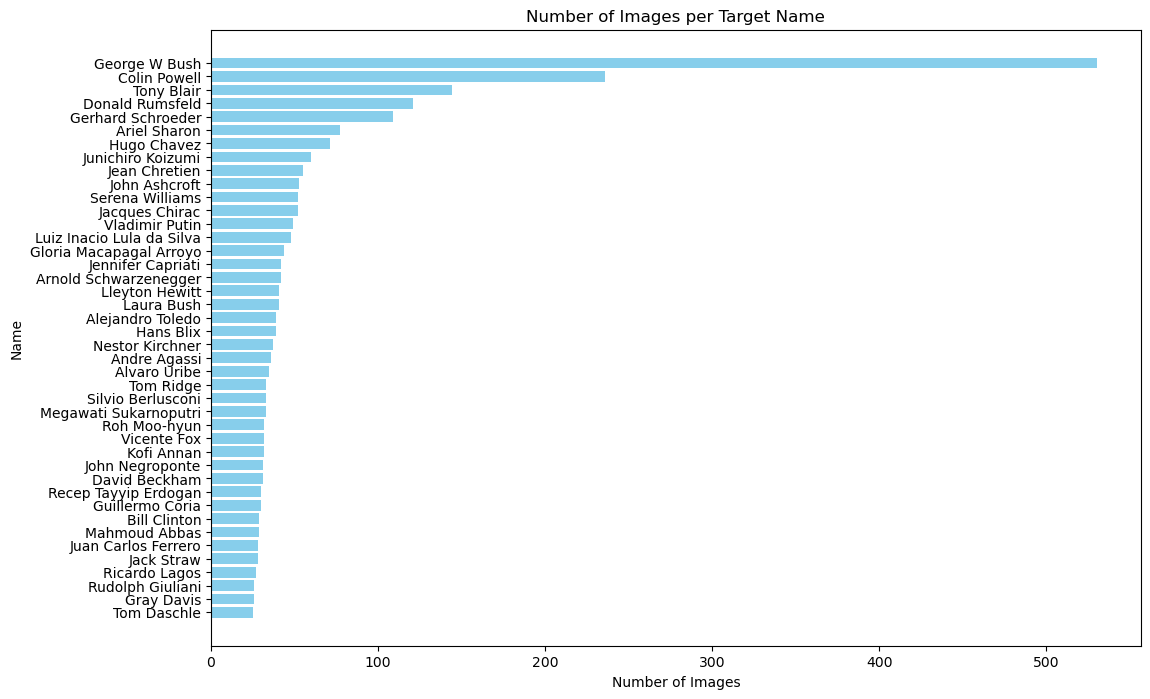

In [17]:
# Sort the DataFrame by number of images (optional)
df = df.sort_values(by='Number of Images', ascending=False).reset_index(drop=True)

# Plot the frequency of images per target name
plt.figure(figsize=(12, 8))
plt.barh(df['Name'], df['Number of Images'], color='skyblue')
plt.xlabel('Number of Images')
plt.ylabel('Name')
plt.title('Number of Images per Target Name')
plt.gca().invert_yaxis()  # Invert y-axis to have the most frequent names on top
plt.show()

##### Procedimiento, análisis y conclusiones:
En la primera parte de esta sección se utiliza la misma informacion con la que se creo el df para hacer una tabla que incluye el numero total de fotos por personaje. Esta sirve de referencia para el desarrollo del taller. <br>
En la segunda parte se ordena el dataframe del punto anterior para mostrar la distribución de imagenes de manera grafica. Allí se observa como personajes como George Bush y Colin Powell tienen un número desproporcionado de imagenes con respecto al resto de los individuos de la lista.<br>
También nos informa sobre la época en la cual se recolectaron estos datos (probablemente al comienzo de los 2000, que es cuando coinciden en la escena política y deportiva la mayoría de estos personajes. 

- ¿Cuántas imágenes pertenecen a Serena Williams? Grafíquelas 

In [18]:
# Utilice este espacio para escribir el código.
# Find the index of the specific name
serena_index = np.where(lfw_people.target_names == "Serena Williams")[0]
print(serena_index)

[35]


In [19]:
# Find all indices in the target array that correspond to Serena Williams
serena_images_indices = np.where(lfw_people.target == serena_index)[0]
serena_images_indices

array([  89,  205,  238,  310,  383,  400,  420,  437,  532,  583,  608,
        681,  827,  831,  837,  964, 1028, 1053, 1126, 1213, 1343, 1482,
       1499, 1603, 1621, 1630, 1776, 1813, 1820, 1833, 1836, 1885, 1926,
       1941, 1949, 1999, 2046, 2053, 2057, 2066, 2083, 2093, 2120, 2136,
       2180, 2221, 2360, 2416, 2444, 2510, 2512, 2535])

In [20]:
# Extract the images of Serena Williams from lfw_people.images
serena_images = lfw_people.images[serena_images_indices]
print(f'Number of images for Serena Williams: {len(serena_images)}')

Number of images for Serena Williams: 52


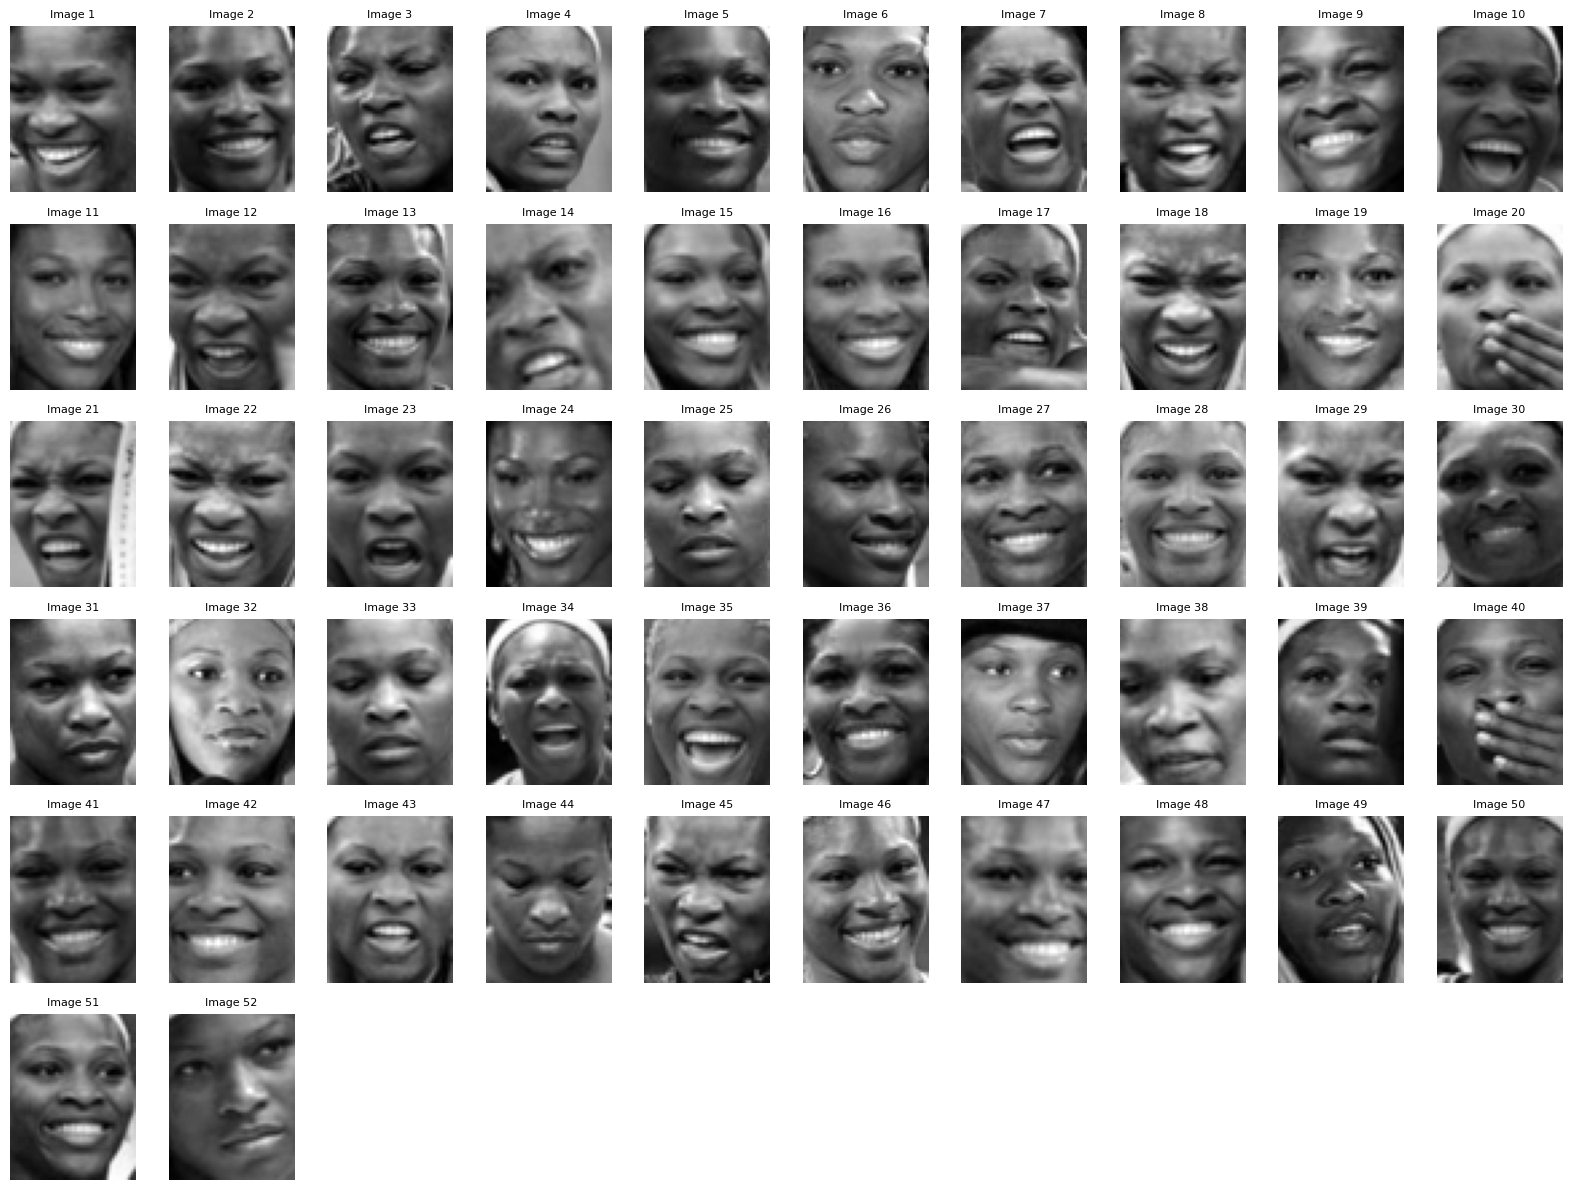

In [21]:
fig, axes = plt.subplots(6, 10, figsize=(16, 12))
for i, (img, ax) in enumerate(zip(serena_images, axes.flat)):
    ax.imshow(img, cmap='gray')
    ax.set_title(f'Image {i+1}', fontsize=8)
    ax.axis('off')
for j in range(i + 1, len(axes.flat)):
    axes.flat[j].axis('off')    
plt.tight_layout()
plt.show()

##### Procedimiento, análisis y conclusiones:
Para encontrar la imagenes de Serena Williams en la data, usando np.where encontramos el indice que la identifica en lfw_people.target_names,  luego utilizamos ese indice para encontrar todos los indices en lfw_people.target == 35 y por ultimo, buscamos sus imagenes en lfw_people.images y las guardamos en serena_images <br>
De la longitud (len) de esta ultima, sabemos que hay 52 imagenes de Williams. Finalmente se grafican las 52 imagenes<br>

### 3.  Reconociendo rostros: las eigenfaces

Las eigenfaces son un conjunto de eigenvectors utilizados en el campo de la visión por computadora, principalmente en el reconocimiento de rostros. Son el resultado de reducir la dimensión de un gran conjunto de imágenes faciales, manteniendo la información que es más relevante para diferenciar las caras.

En este apartado buscaremos encontrar el espacio de menor dimensión manteniendo la información que es más relevante para diferenciar las caras. Lo haremos en etapas:


#### 3.1. Rostro promedio. 

Encuentre primero el "rostro promedio" y grafíquelo.  Para encontrar este rostro, necesita calcular el valor promedio de los pixeles. (*Tip: Si X es la matriz donde las filas representan las imágenes  y en las columnas el tono de gris de los píxeles, debería calcular el promedio para cada una de las columnas*).
 

Shape of images array: (2588, 62, 47)
Shape of 'rostro promedio': (62, 47)


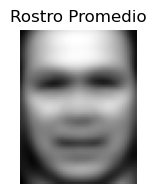

In [22]:
# Utilice este espacio para escribir el código.
X = lfw_people.images

# Check the shape of the images array
print("Shape of images array:", X.shape) # if 3D Shape (n_samples, height, width) => Not Flattened

rostro_promedio = np.mean(X, axis=0) 
print(f"Shape of 'rostro promedio': {rostro_promedio.shape}")

# Plot the average image
plt.figure(figsize=(2, 2))
plt.imshow(rostro_promedio, cmap='gray')
plt.title('Rostro Promedio')
plt.axis('off')  # Turn off axis
plt.show()

##### Procedimiento, análisis y conclusiones:
Aqui definimos X = lfw_people images, y se encuentra el promedio con Numpy mean sobre el eje 0, para calcular el promedio de todas las imagenes a nivel de pixeles. Se obtiene un promedio que al graficarlo nos informa que todos los rostros tienen una forma relativamente ovalada, con dos orificios en la parte superior que corresponden a los ojos, una prominencia en el medio igual a la nariz, y un orificio rectangular que le sigue (boca) y finalmente una terminación semi ovalada correspondiente al menton. Se observan detalles como los pómulos, y su color es claro. 

#### 3.2. Reste el rostro promedio.

A cada una de las imágenes, reste el rostro promedio, es decir, reste la media a cada columna. Grafique las imágenes de Serena Williams luego de quitarle el rostro promedio.

In [23]:
# Utilice este espacio para escribir el código.
X_centered = X - rostro_promedio
print("Tercera imagen en X:\n", np.round(X[2],3))
print("Rostro promedio:\n", np.round(rostro_promedio,3))
print("Tercera imagen en X_centered:\n", np.round(X_centered[2],3))

Tercera imagen en X:
 [[0.375 0.38  0.435 ... 0.438 0.353 0.327]
 [0.358 0.4   0.472 ... 0.475 0.382 0.356]
 [0.348 0.39  0.501 ... 0.525 0.392 0.35 ]
 ...
 [0.09  0.077 0.09  ... 0.089 0.084 0.085]
 [0.094 0.081 0.077 ... 0.099 0.089 0.098]
 [0.093 0.071 0.078 ... 0.092 0.09  0.09 ]]
Rostro promedio:
 [[0.336 0.348 0.369 ... 0.358 0.347 0.342]
 [0.341 0.357 0.384 ... 0.366 0.348 0.341]
 [0.348 0.369 0.399 ... 0.376 0.352 0.341]
 ...
 [0.341 0.354 0.367 ... 0.436 0.42  0.406]
 [0.335 0.349 0.366 ... 0.444 0.425 0.408]
 [0.328 0.342 0.362 ... 0.45  0.429 0.407]]
Tercera imagen en X_centered:
 [[ 0.039  0.032  0.066 ...  0.08   0.006 -0.015]
 [ 0.017  0.043  0.088 ...  0.109  0.034  0.015]
 [-0.     0.021  0.101 ...  0.149  0.04   0.009]
 ...
 [-0.251 -0.277 -0.277 ... -0.348 -0.336 -0.321]
 [-0.24  -0.268 -0.289 ... -0.345 -0.336 -0.31 ]
 [-0.235 -0.271 -0.283 ... -0.359 -0.339 -0.317]]


Number of images (centered) of Serena Williams: 52


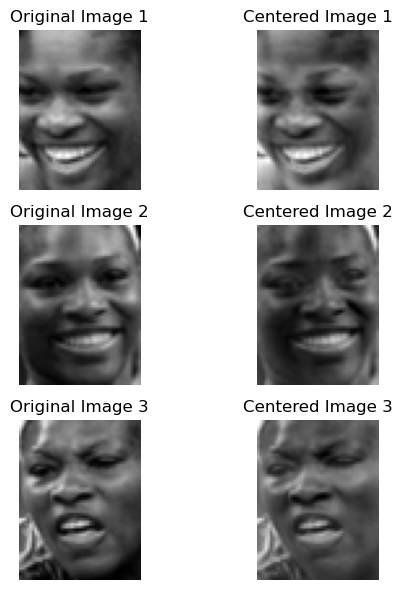

In [24]:
# Extract the images of Serena Williams from X (lfw_people.images)
serena_images_centered = X_centered[serena_images_indices]
print(f"Number of images (centered) of Serena Williams: {len(serena_images_centered)}")

num_images = 3
# Display the first few images of Serena Williams
plt.figure(figsize=(6, 2 * num_images))

for i in range(num_images):
    # Plot the original image
    plt.subplot(num_images, 2, 2 * i + 1)  # Row, Column, Position
    plt.imshow(serena_images[i], cmap='gray')
    plt.title(f'Original Image {i+1}')
    plt.axis('off')

    # Plot the centered image
    plt.subplot(num_images, 2, 2 * i + 2)  # Row, Column, Position
    plt.imshow(serena_images_centered[i], cmap='gray')
    plt.title(f'Centered Image {i+1}')
    plt.axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

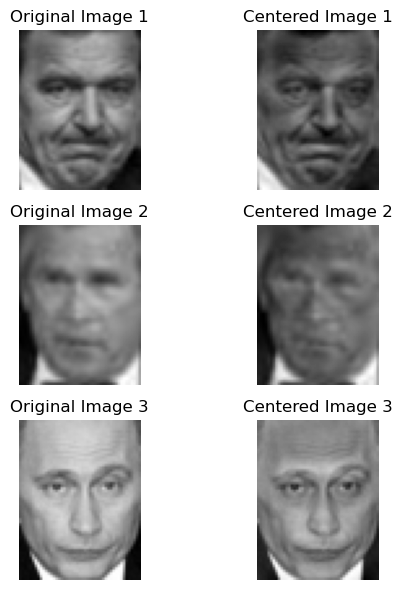

In [25]:
# Plot images
num_images = 3
plt.figure(figsize=(6, 2 * num_images))

for i in range(num_images):
    # Plot the original image
    plt.subplot(num_images, 2, 2 * i + 1) 
    plt.imshow(X[i], cmap='gray')
    plt.title(f'Original Image {i+1}')
    plt.axis('off')

    # Plot the centered image
    plt.subplot(num_images, 2, 2 * i + 2)  
    plt.imshow(X_centered[i], cmap='gray')
    plt.title(f'Centered Image {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

##### Procedimiento, análisis y conclusiones:
En este segundo paso se sustrae de X el promedio hallado en el punto anterior creando una nueva matriz llamada X_centered. Al imprimir cualquier elemento de la matriz X, en este caso el segundo, y restar uno a uno sus elementos, se puede verificar que la resta se esta haciendo correctamente: <br>
0.375 - 0.336 = 0.039<br>
0.38 - 0.348 = 0.032 <br>
Al sustraer el rostro promedio, se suprime la informacion que está en todas las imagenes, destacando los elementos que hacen las imagenes diferentes unas de otras. En las imagenes de Williams esto no es tan evidente, dado que se trata de una persona de color, pero al graficar los primeros tres elementos de X y X_centered correspondientes a hombres blancos, vemos como sus rostros se oscurecen. Esto porque en últimas le estamos restando un "rostro promedio" que es blanco: 1912 de las 2588 imagenes son de personas blancas (74%) 

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 3.3. Descomposición en Valores Singulares 

Aplique la Descomposición en Valores Singulares a estas nuevas imágenes y retenga solo $K=1000$ valores singulares? ¿Qué proporción de la varianza representan estos valores singulares?

In [26]:
# Utilice este espacio para escribir el código.

In [27]:
# flattening the matrix
num_imgs, h, w = X_centered.shape 
X_cntr_flat = X_centered.reshape(num_imgs, h * w)
K = 1000

In [28]:
# Descomposicion Valores Singulares
from scipy.linalg import svd
U, S, Vt = svd(X_cntr_flat)

In [29]:
print("Tamaño Matriz U  (columnas son eigen vectores de 𝑋𝑇𝑋):", U.shape)
print("Tamaño Vector S  (valores singulares):",
      S.shape)
print("Tamaño Matriz V𝑇 (columnas son eigen vectores de 𝑋𝑋𝑇):", Vt.shape)

Tamaño Matriz U  (columnas son eigen vectores de 𝑋𝑇𝑋): (2588, 2588)
Tamaño Vector S  (valores singulares): (2588,)
Tamaño Matriz V𝑇 (columnas son eigen vectores de 𝑋𝑋𝑇): (2914, 2914)


In [30]:
U2 = U[:, 0:K]
Vt2 = Vt[0:K, :]
S2 = np.resize(S,[K,1])*np.eye(K,K) #ponemos los valores singulares en una matriz diagonal

In [31]:
print(f"Tamaño Matriz U2  (columnas son los primeros {K} eigen vectores de 𝑋𝑇𝑋):", U2.shape)
print(f"Tamaño Matriz S2  (valores en la diagonal = primeros {K} valores singulares):",
      S2.shape)
print(f"Tamaño Matriz V𝑇2 (columnas son los primeros {K} eigen vectores de 𝑋𝑋𝑇):", Vt2.shape)

Tamaño Matriz U2  (columnas son los primeros 1000 eigen vectores de 𝑋𝑇𝑋): (2588, 1000)
Tamaño Matriz S2  (valores en la diagonal = primeros 1000 valores singulares): (1000, 1000)
Tamaño Matriz V𝑇2 (columnas son los primeros 1000 eigen vectores de 𝑋𝑋𝑇): (1000, 2914)


In [32]:
# Varianza Explicada
varianza_total = np.sum(S**2)
varianza_explicada = np.sum(S2**2)
proporcion_varianza = varianza_explicada/varianza_total
print(f"Proporción de la varianza representada por los primeros K={K} valores singulares: {proporcion_varianza:.4f}")

Proporción de la varianza representada por los primeros K=1000 valores singulares: 0.9979


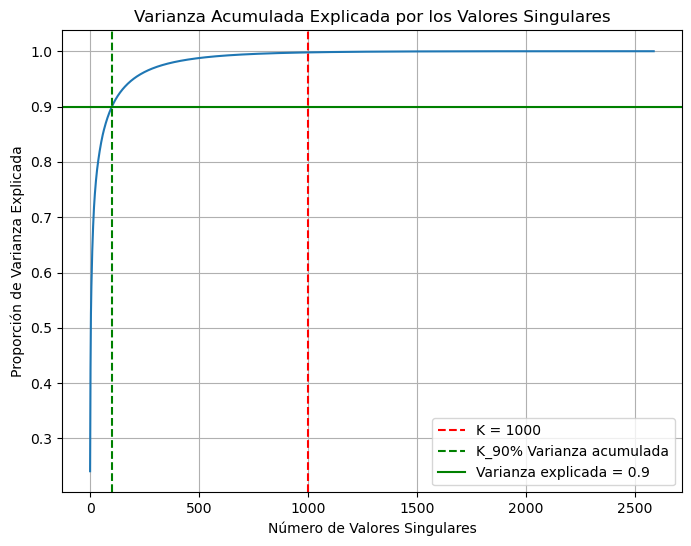

Numero de Valores Singulares para los cuales se explica al menos el 90% de la varianza acumulada:  101


In [33]:
# Visualizar la varianza explicada acumulada
varianza_explicada_acumulada1 = np.cumsum(S**2) / varianza_total
K_90 = np.where(varianza_explicada_acumulada1 >= 0.9)[0][0]


plt.figure(figsize=(8, 6))
plt.plot(varianza_explicada_acumulada1)
plt.axvline(x=K, color='r', linestyle='--', label=f'K = {K}')
plt.axvline(x=K_90, color='g', linestyle='--', label="K_90% Varianza acumulada")
plt.axhline(y=0.9, color='g', linestyle='-', label='Varianza explicada = 0.9')


plt.title('Varianza Acumulada Explicada por los Valores Singulares')
plt.xlabel('Número de Valores Singulares')
plt.ylabel('Proporción de Varianza Explicada')
plt.grid(True)
plt.legend() 
plt.show()

print("Numero de Valores Singulares para los cuales se explica al menos el 90% de la varianza acumulada: ", K_90)



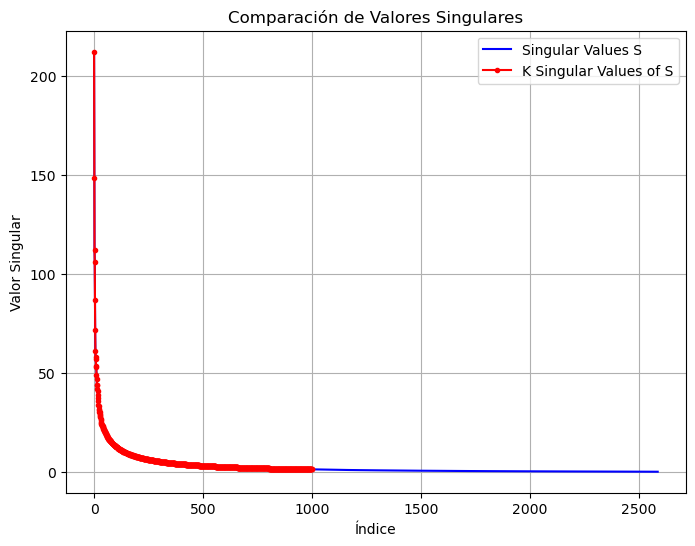

In [34]:
# Graficar los valores singulares
plt.figure(figsize=(8, 6))

# Plot for S
plt.plot(S, label='Singular Values S', color='blue')

# Plot for S2 
plt.plot(np.diag(S2), label='K Singular Values of S', color='red', marker='.')

plt.title('Comparación de Valores Singulares')
plt.xlabel('Índice')
plt.ylabel('Valor Singular')

plt.grid(True)
plt.legend()

plt.show()

##### Metodo 2 -  TruncatedSVD

In [35]:
from sklearn.decomposition import TruncatedSVD
# Definir SVD con K=1000 componentes definidos en el Metodo 1
K=1000
svd = TruncatedSVD(n_components=K)

# Ajustar y transformar las imágenes aplanadas
X_svd = svd.fit_transform(X_cntr_flat)

In [36]:
# Calcular la varianza explicada por los primeros K valores singulares
varianza_explicadaTsvd = np.sum(svd.explained_variance_ratio_)
print(f"Proporción de la varianza explicada por los primeros {K} valores singulares: {varianza_explicadaTsvd:.4f}")

Proporción de la varianza explicada por los primeros 1000 valores singulares: 0.9979


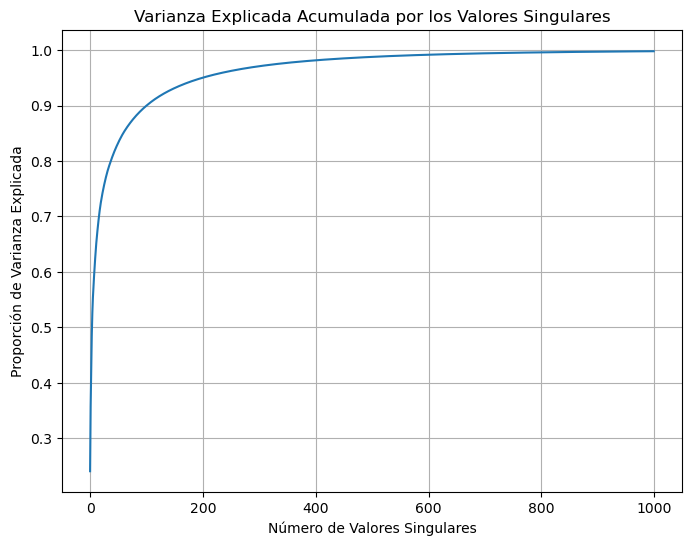

In [37]:
# Visualizar la varianza explicada acumulada
varianza_explicada_acumuladaTsvd = np.cumsum(svd.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(varianza_explicada_acumuladaTsvd)
plt.title('Varianza Explicada Acumulada por los Valores Singulares')
plt.xlabel('Número de Valores Singulares')
plt.ylabel('Proporción de Varianza Explicada')
plt.grid(True)
plt.show()

##### Procedimiento, análisis y conclusiones:
Para la descomposicion de valores singulares se usaron dos metodos: el que se estudio en clase (svd) truncado y un TruncatedSVD de sklearn. <br>
Antes de calcular las matrices U, S y Vt la matriz X_centrada se aplana: X_cntr_flat. <br> En el primer metodo es necesario calcular manualmente la matriz diagonal S con base en el vector S obtenido por svd, y tambien truncar manualmente las matrices por los K componentes de la manera en que se vio en clase<br>
Con ambos metodos se obtuvieron los mismos resultados: Porcentaje de varianza explicada por los 1000 componentes seleccionados = 99.79%. Esto representa un gran beneficio puesto que de 2914 variables iniciales, bajamos a 1000 componentes para explicar practicamente la misma información. <br>Con certeza, con aún menos componentes se puede obtener un porcentaje de varianza explicada aceptable, por ejemplo, con 101 componentes se la varianza acumulada explicada es del 90%. 

#### 3.4. Representando los rostros en las bases

Las eigenfaces nos dice que cada rostro puede ser representado a partir de la aproximación a la matriz original por la matriz de dimensión reducida (determinada en el punto anterior), más el rostro promedio. Muestre que esto es posible para las imágenes de Serena Williams. Compare las imágenes reconstruidas con las originales.

In [38]:
# Utilice este espacio para escribir el código.

##### Metodo 1 - scipy svd -

In [39]:
# X_truncada por K = 1000 valores singulares
X_truncada = (np.dot(U2,np.dot(S2,Vt2)))
print(X_truncada.shape)
# flattening rostro_promedio
rostro_promedio_plano = rostro_promedio.reshape(1,h*w) 

(2588, 2914)


In [40]:
# Reconstruccion Matriz X
X_reconstructed_v0 = X_truncada + rostro_promedio_plano
X_reconstructed_v0_reshaped = X_reconstructed_v0.reshape(num_imgs, h, w)
X_reconstructed_v0_reshaped.shape

(2588, 62, 47)

In [41]:
# Serena Images reconstructed and reshaped
serena_images_rec_v0 = X_reconstructed_v0_reshaped[serena_images_indices]
print(f"Numero imagenes reconstruidas de Serena Williams: {len(serena_images_rec_v0)}")

Numero imagenes reconstruidas de Serena Williams: 52


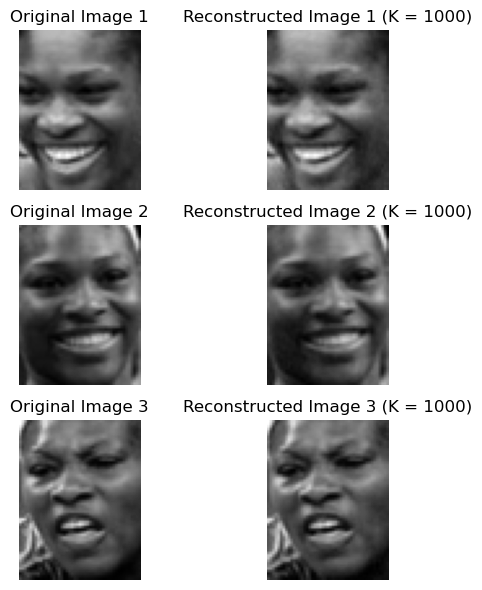

In [42]:
plt.figure(figsize=(8, 2 * num_images))

for i in range(num_images):
    # Plot the original image
    plt.subplot(num_images, 3, 3 * i + 1)  # Row, Column, Position
    plt.imshow(serena_images[i], cmap='gray')
    plt.title(f'Original Image {i+1}')
    plt.axis('off')

    # Plot the centered image
    plt.subplot(num_images, 3, 3 * i + 2)  # Row, Column, Position
    plt.imshow(serena_images_rec_v0[i], cmap='gray')
    plt.title(f'Reconstructed Image {i+1} (K = {K})')
    plt.axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

##### Metodo 2 - TruncatedSVD

In [43]:
# Reconstruct the images from the SVD components
X_reconstructed_v1 = svd.inverse_transform(X_svd)
X_reconstructed_v1 = X_reconstructed_v1 + rostro_promedio_plano
X_reconstructed_v1 = X_reconstructed_v1.reshape(num_imgs, h, w)

In [44]:
# Serena Images reconstructed and reshaped
serena_images_rec_v1 = X_reconstructed_v1[serena_images_indices]

In [45]:
# Imagenes con K = 150
svd150 = TruncatedSVD(n_components=150)
X_svd150 = svd150.fit_transform(X_cntr_flat)
X_reconstructed_v150 = svd150.inverse_transform(X_svd150)
X_reconstructed_v150 = X_reconstructed_v150 + rostro_promedio_plano
X_reconstructed_v150 = X_reconstructed_v150.reshape(num_imgs, h, w)
serena_images_rec_v150 = X_reconstructed_v150[serena_images_indices]

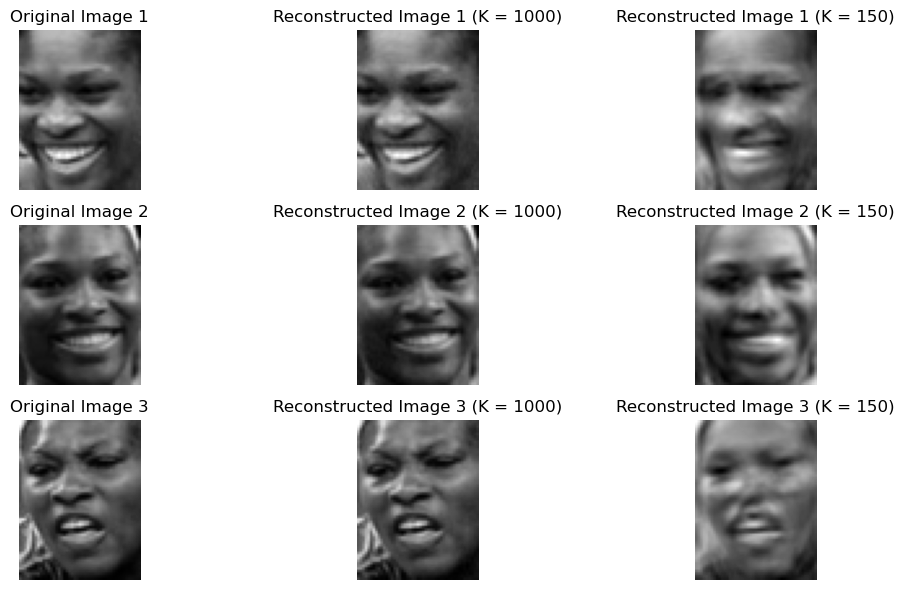

In [46]:
plt.figure(figsize=(12, 2 * num_images))

for i in range(num_images):
    # Plot the original image
    plt.subplot(num_images, 3, 3 * i + 1)  # Row, Column, Position
    plt.imshow(serena_images[i], cmap='gray')
    plt.title(f'Original Image {i+1}')
    plt.axis('off')
    
    # Plot the centered image
    plt.subplot(num_images, 3, 3 * i + 2)  # Row, Column, Position
    plt.imshow(serena_images_rec_v1[i], cmap='gray')
    plt.title(f'Reconstructed Image {i+1} (K = {K})')
    plt.axis('off')
    
    # Plot the reconstructed image
    plt.subplot(num_images, 3, 3 * i + 3)  # Row, Column, Position
    plt.imshow(serena_images_rec_v150[i], cmap='gray')
    plt.title(f'Reconstructed Image {i+1} (K = 150)')
    plt.axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

##### Procedimiento, análisis y conclusiones:
Para la reconstrucción de la matriz de datos se utilizan los componentes esvd de valores singulares se usaron dos metodos: el que se estudio en clase (svd) truncado y un TruncatedSVD de sklearn. <br>
En el primer caso se multiplican U2*S2*Vt2, la cual tiene una forma plana,  y se le suma el rostro_promedio en su forma plana. Luego se le vuelve a dar la forma de la matriz inicial. Con el segundo metodo el procedimiento es mas sencillo pues solo haciendo inverse_transform se reconstruye la matriz en su forma plana. Al igual que en el primer metodo es necesario sumarle el rostro promedse ubican sus imagenes en las matrices reconstruidas, y se grafican algunas de ellas al lado de las imagenes originales (primer metodo). A simple vista es dificil identificar las diferencias entre las imagenes de la primera y la segunda columna, corroborando asi que con 1000 componentes se consigue reconstruir con muy buena calidad la matriz original. <br>
Se usa el segundo metodo para reconstruir las imagenes con K= 1000 y K=150 (tercera columna) y a pesar del deterioro de la imagen, aún es posible identificar a Serena Williams, al menos eso sucedio al mostrarsela a alguien ajeno al taller. 

### 4. Uniendo Aprendizaje No Supervisado y Supervisado

Dado que cada rostro puede ser representado por las eigenfaces, y la relación que existe entre componentes principales y la SVD, esto sugiere que los componentes principales aquí determinados pueden servir de insumo para un algoritmo de clasificación de aprendizaje supervisado. En este sección del taller haremos esto.

Para ello construiremos un modelo de clasificación logístico para predecir si la imagen pertenece a `George W Bush`  (el individuo con más imágenes en la base)  o no.

#### 4.1. Identificando a `George W Bush`

Cree una variable binaria que tome el valor 1 si la imagen pertenece a `George W Bush` y 0 en caso contrario.

In [47]:
# Utilice este espacio para escribir el código.
# George W. Bush index in lfw_people.target_names
bush_index = np.where(lfw_people.target_names == "George W Bush")[0]
bush_index

array([9])

Number of images for George W. Bush: 530


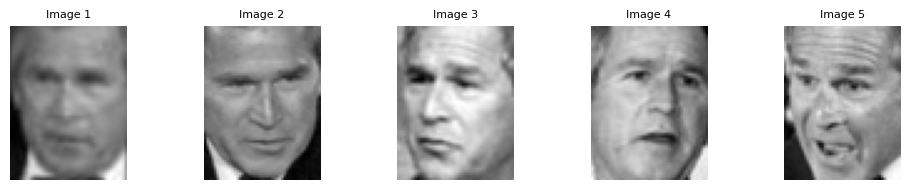

In [48]:
# Find all indices in the target array that correspond to Serena Williams
bush_images_indices = np.where(lfw_people.target == bush_index)[0]

# Extract the images of George W. Bush from X (lfw_people.images)
bush_images = lfw_people.images[bush_images_indices]
print(f'Number of images for George W. Bush: {len(bush_images)}')

# first 5 images
fig, axes = plt.subplots(1, 5, figsize=(10, 2))  # 1 row, 5 columns

for i, (img, ax) in enumerate(zip(bush_images[:5], axes)):
    ax.imshow(img, cmap='gray')
    ax.set_title(f'Image {i+1}', fontsize=8)
    ax.axis('off')
    
plt.tight_layout()
plt.show()

In [49]:
bush_binary = (lfw_people.target == bush_index).astype(int)

In [50]:
bush_binary

array([0, 1, 0, ..., 1, 0, 1])

In [51]:
len(bush_binary)

2588

In [52]:
sum(bush_binary)

530

##### Procedimiento, análisis y conclusiones:
De la misma manera que se ubicaron las imagenes de Serena Williams en el punto 2, se identifican los indices y las imagenes de Bush. Con los primeros se crea la variable binaria bush_binary == 1 cuando se trata de Bush, y 0 de lo contrario. Se valida que tal variable tenga la misma longitudo de las imagenes originales, que 530 de ellas tengan el valor 1. 

#### 4.2. Bases de Entrenamiento y Prueba.

Divida la base utilizada anteriormente en dos: 80% de la base de imágenes asígnelas a la base de entrenamiento y el 20% restante a la de prueba, utilice un `random_state=10101`. 

In [53]:
# Utilice este espacio para escribir el código.
from sklearn.model_selection import train_test_split

print("X fue definido anteriormente como: X = lfw_people.images")
y = bush_binary
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10101)

X fue definido anteriormente como: X = lfw_people.images


In [54]:
print("20% longitud de los datos originales =", len(X)*.2)
print("Tamaño X_test:", len(X_test), "Tamaño de y_test:", len(y_test))

20% longitud de los datos originales = 517.6
Tamaño X_test: 518 Tamaño de y_test: 518


##### Procedimiento, análisis y conclusiones:
En este punto se iguala la variable y = bush_binary. con esta y la matriz original X se dividen los datos en train y test de acuerdo con las instrucciones del taller. Se valida que el tamaño de los datos de test obtenidos sean iguales al 20% de los datos.

#### 4.3. Descomposición en Valores Singulares 

Para la base de entrenamiento y de prueba, realice la descomposición en valores singulares (Recuerde recentrar las matrices para que tenga media 0). 

Tamaño 'rostro promedio' en datos de entrenamiento': (62, 47)
Tamaño 'rostro promedio' en datos de prueba': (62, 47)


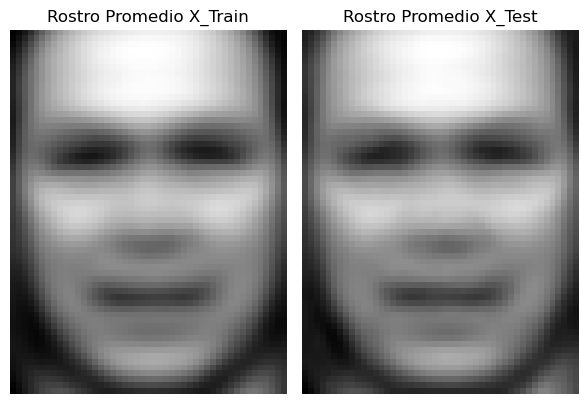

In [55]:
# Utilice este espacio para escribir el código.
# rostro promedio en train
rostro_promedio_train = np.mean(X_train, axis=0)
rostro_promedio_test = np.mean(X_test, axis=0) 
print(f"Tamaño 'rostro promedio' en datos de entrenamiento': {rostro_promedio_train.shape}")
print(f"Tamaño 'rostro promedio' en datos de prueba': {rostro_promedio_test.shape}")

fig, axes = plt.subplots(1, 2, figsize=(6, 4))

# Plot the mean face for X_train
axes[0].imshow(rostro_promedio_train.reshape(62, 47), cmap='gray')  # Assuming images are 62x47 pixels
axes[0].set_title('Rostro Promedio X_Train')
axes[0].axis('off')  # Turn off axis

# Plot the mean face for X_test
axes[1].imshow(rostro_promedio_test.reshape(62, 47), cmap='gray')  # Assuming images are 62x47 pixels
axes[1].set_title('Rostro Promedio X_Test')
axes[1].axis('off')  # Turn off axis

plt.tight_layout()
plt.show()

In [56]:
# Centrando X_train, X_test
X_train_centered = X_train - rostro_promedio_train
X_test_centered = X_test - rostro_promedio_test 

In [57]:
X_train_centered.shape

(2070, 62, 47)

In [58]:
num_imgs_tr, h_tr, w_tr = X_train_centered.shape 
print("num_imgs_tr: ",num_imgs_tr)
print("h_tr: ",h_tr)
print("w_tr: ",w_tr)

num_imgs_tr:  2070
h_tr:  62
w_tr:  47


In [59]:
num_imgs_ts, h_ts, w_ts = X_test_centered.shape 
print("num_imgs_ts: ",num_imgs_ts)
print("h_ts: ",h_ts)
print("w_ts: ",w_ts)

num_imgs_ts:  518
h_ts:  62
w_ts:  47


In [60]:
# Aplanar los datos para aplicar SVD
X_train_cntr_flat = X_train_centered.reshape(num_imgs_tr, h_tr * w_tr)
X_test_cntr_flat = X_test_centered.reshape(num_imgs_ts, h_ts * w_ts)

In [61]:
X_train_cntr_flat.shape

(2070, 2914)

##### Descomposicion Valores Singulares X_train

In [62]:
from scipy.linalg import svd
U_trn, S_trn, Vt_trn = svd(X_train_cntr_flat)

In [63]:
##### OJO K #####
#K=150 # para probar el cross validation
K=1000

In [64]:
print("Tamaño Matriz U:", U_trn.shape)
print("Tamaño Vector S:", S_trn.shape)
print("Tamaño Matriz V𝑇:", Vt_trn.shape)

Tamaño Matriz U: (2070, 2070)
Tamaño Vector S: (2070,)
Tamaño Matriz V𝑇: (2914, 2914)


In [65]:
# PC Components
n_trn,k_trn=X_train_cntr_flat.shape
S2_trn= np.resize(S_trn,[n_trn,1])*np.eye(n_trn,k_trn) #ponemos los valores singulares en una matriz diagonal
PC_trn= np.dot(U_trn[:,0:K],S2_trn[0:K,0:K]) # Componentes Principales

In [66]:
print("Tamaño Matriz S2:", S2_trn.shape)
print("Tamaño Matriz PC:", PC_trn.shape)

Tamaño Matriz S2: (2070, 2914)
Tamaño Matriz PC: (2070, 1000)


##### Descomposicion Valores Singulares X_test

In [67]:
from scipy.linalg import svd
U_tst, S_tst, Vt_tst = svd(X_test_cntr_flat) 

In [68]:
print("Tamaño Matriz U:", U_tst.shape)
print("Tamaño Vector S:", S_tst.shape)
print("Tamaño Matriz V𝑇:", Vt_tst.shape)

Tamaño Matriz U: (518, 518)
Tamaño Vector S: (518,)
Tamaño Matriz V𝑇: (2914, 2914)


In [69]:
# PC Components
n_test,k_test=X_test_cntr_flat.shape
S2_tst= np.resize(S_tst,[n_test,1])*np.eye(n_test,k_test) #ponemos los valores singulares en una matriz diagonal
PC_tst= np.dot(U_tst[:,0:K],S2_tst[0:K,0:K]) # Componentes Principaleslas 

In [70]:
print("Tamaño Matriz S2_tst:", S2_tst.shape)
print("Tamaño Matriz PC_tst:", PC_tst.shape)

Tamaño Matriz S2_tst: (518, 2914)
Tamaño Matriz PC_tst: (518, 1000)


##### Procedimiento, análisis y conclusiones:
El objeto de este punto es aprovechar la relacion entre PCA y SVD para encontrar los componentes principales. <br>
El X_pca (PC_trn y PC_tst en el codigo anterior) se obtiene multiplicando las matrices U y S2. Donde S2 es la matriz diagonalizada a partir de los valores singulares encontrados encontrados en svd. <br>
Cabe anotar que esta demostración fue aportada en las sesiones de tutoría de la semana, y mi interpretacion es que mas que querer reconctruir la matriz original, con este metodo se consiguen los eigenvectores que proveen la minima informacion necesaria para identificar las imagenes.  Este procedimiento se aplica tanto en la muestra de entrenamiento como de prueba, y los resultados obtenidos se usaran para el ajuste del modelo de regresión lineal y su prueba respectivamente

#### 4.4. Estimación de modelo de aprendizaje supervisado


Utilizando $k=1000$ valores singulares, construya los 1000 primeros componentes principales y úselos como predictores en su modelo logístico. Utilice como métrica de performance el porcentaje de imágenes de `George W Bush` clasificadas correctamente.

Para estimar su modelo logístico utilice el `solver='sag`,`random_state=10101` y `max_iter=1000`. Como se muestra a continuación:



In [71]:
from sklearn.linear_model import LogisticRegression

Modelo_Logistico = LogisticRegression(solver='sag',random_state=10101, max_iter=1000)

# Utilice este espacio para escribir el código restante.

In [72]:
# Entrenar el modelo usando los 1000 componentes principales como predictores
Modelo_Logistico.fit(PC_trn, y_train)

LogisticRegression(max_iter=1000, random_state=10101, solver='sag')

In [73]:
# Evaluar el modelo en el conjunto de prueba
accuracy_trn = Modelo_Logistico.score(PC_trn, y_train)

# Mostrar el rendimiento del modelo
print(f"Exactitud del modelo en el conjunto de prueba: {accuracy_trn:.4f}")

Exactitud del modelo en el conjunto de prueba: 0.9768


In [74]:
# Evaluar el modelo en el conjunto de prueba
accuracy_tst = Modelo_Logistico.score(PC_tst, y_test)

# Mostrar el rendimiento del modelo
print(f"Exactitud del modelo en el conjunto de prueba: {accuracy_tst:.4f}")

Exactitud del modelo en el conjunto de prueba: 0.7355


In [75]:
# Realizar predicciones en el conjunto de prueba
y_pred = Modelo_Logistico.predict(PC_tst)

# Calcular el porcentaje de imágenes de George W. Bush clasificadas correctamente
true_positives = np.sum((y_test == 1) & (y_pred == 1))
total_bush_images = np.sum(y_test == 1)

recall = (true_positives / total_bush_images) * 100

print(f"Porcentaje de imágenes de George W. Bush clasificadas correctamente (Recall): {recall:.2f}%")

Porcentaje de imágenes de George W. Bush clasificadas correctamente (Recall): 26.79%


              precision    recall  f1-score   support

           0       0.81      0.86      0.84       406
           1       0.35      0.27      0.30       112

    accuracy                           0.74       518
   macro avg       0.58      0.57      0.57       518
weighted avg       0.71      0.74      0.72       518



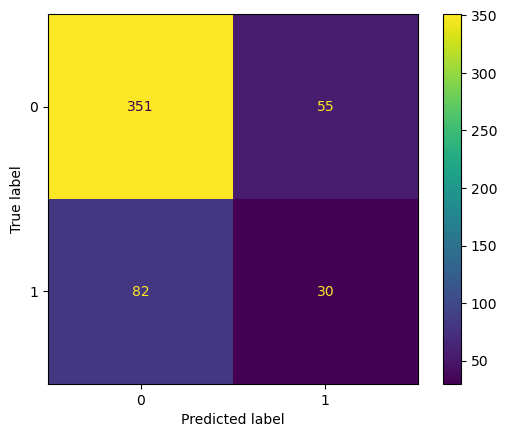

In [76]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Print the classification report
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

###### Procedimiento, análisis y conclusiones:
Con los componentes principales para las muestras de train y test que se encontraron en el punto anterior se entrena y prueba el modelo de regresión logística de acuerdo con las instrucciones del taller. <br>
Los resultados obtenidos no son los mejores, pues la exactitud (accuracy) del modelo obtenida en los datos de entrenamiento es 0.9768, esta se deteriora bastante en el conjunto de prueba 0.73, y el recall del modelo, que es la metrica que mas interesa para efectos del taller, es bastante bajo: 0.2679 <br>
La razón por la cual sucede esto es que existe un desbalanceo de clases. Aun cuando Bush es el personaje con más imágenes en el conjunto de datos, el porcentaje sus imagenes con respecto al total es aolo del 20.5% y este hecho se refleja en los conjuntos de entrenamiento y prueba.<br>
La aplicacion de técnicas de rebalanceo esta por fuera del alcance de este taller.

#### 4.5. Mejorando el Ajuste

Trate ahora el número de valores singulares como un hiper-parámetro a encontrar. Emplee validación cruzada con 5 o 10 folds (dependiendo de su poder computacional) para encontrar el número óptimo de valores singulares. Con este modelo, evalúe el porcentaje de imágenes de `George W Bush` clasificadas correctamente en su muestra de prueba. Compare y discuta esta forma de elegir el número de variables con aquella utilizada en  4.4. (Esto puede tomar mucho tiempo y requerir mucha capacidad computacional, puede aprovechar los recursos de [Google Colab](https://colab.research.google.com/))


In [77]:
# Utilice este espacio para escribir el código.
import time

In [78]:
from sklearn.model_selection import KFold

def find_best_K(X_train_cntr_flat, y_train, X_test_cntr_flat, y_test, max_K=1000):
    best_K = 0
    best_recall = 0
    folds = 5 # Cambiar por 10 para ver desempeño con 10 folds
    kf = KFold(n_splits=folds, shuffle=True, random_state=10101)
    K_list = []
    mean_recall_list = []
    
    for K in range(50, max_K + 1, 50):
        recalls = []
        K_list.append(K)
        for train_index, val_index in kf.split(X_train_cntr_flat):
            X_trn, X_val = X_train_cntr_flat[train_index], X_train_cntr_flat[val_index]
            y_trn, y_val = y_train[train_index], y_train[val_index]
            
            U_trn, S_trn, Vt_trn = svd(X_trn)
            n_trn, k_trn = X_trn.shape
            S2_trn = np.resize(S_trn, [n_trn, 1]) * np.eye(n_trn, k_trn)
            PC_trn = np.dot(U_trn[:, 0:K], S2_trn[0:K, 0:K])
            
            U_val, S_val, Vt_val = svd(X_val)
            n_val, k_val = X_val.shape
            S2_val = np.resize(S_val, [n_val, 1]) * np.eye(n_val, k_val)
            PC_val = np.dot(U_val[:, 0:K], S2_val[0:K, 0:K])
            
            Modelo_Logistico = LogisticRegression(solver='sag', random_state=10101, max_iter=1000)
            Modelo_Logistico.fit(PC_trn, y_trn)
            
            y_val_pred = Modelo_Logistico.predict(PC_val)
            true_positives = np.sum((y_val == 1) & (y_val_pred == 1))
            total_bush_images = np.sum(y_val == 1)
            recall = (true_positives / total_bush_images) * 100 if total_bush_images > 0 else 0
            recalls.append(recall)
        
        mean_recall = np.mean(recalls)
        mean_recall_list.append(mean_recall)
        print(f"K: {K}, Mean Recall: {mean_recall:.2f}%")
        
        if mean_recall > best_recall:
            best_recall = mean_recall
            best_K = K
    
    # After finding the best K, apply it to the test set
    U_trn, S_trn, Vt_trn = svd(X_train_cntr_flat)
    n_trn, k_trn = X_train_cntr_flat.shape
    S2_trn = np.resize(S_trn, [n_trn, 1]) * np.eye(n_trn, k_trn)
    PC_trn = np.dot(U_trn[:, 0:best_K], S2_trn[0:best_K, 0:best_K])

    U_tst, S_tst, Vt_tst = svd(X_test_cntr_flat)
    n_test, k_test = X_test_cntr_flat.shape
    S2_tst = np.resize(S_tst, [n_test, 1]) * np.eye(n_test, k_test)
    PC_tst = np.dot(U_tst[:, 0:best_K], S2_tst[0:best_K, 0:best_K])

    Modelo_Logistico = LogisticRegression(solver='sag', random_state=10101, max_iter=1000)
    Modelo_Logistico.fit(PC_trn, y_train)
    
    y_pred = Modelo_Logistico.predict(PC_tst)
    true_positives = np.sum((y_test == 1) & (y_pred == 1))
    total_bush_images = np.sum(y_test == 1)
    final_recall = (true_positives / total_bush_images) * 100 if total_bush_images > 0 else 0

    print(f"Best K: {best_K}, Final Recall on Test Set: {final_recall:.2f}%")
    return best_K, final_recall, K_list, mean_recall_list

In [79]:
# Start the timer
start_time = time.time()
best_K, final_recall, K_list, mean_recall_list = find_best_K(X_train_cntr_flat, y_train, X_test_cntr_flat, y_test, max_K=1000)
# End the timer
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.2f} seconds")

K: 50, Mean Recall: 15.77%
K: 100, Mean Recall: 16.74%
K: 150, Mean Recall: 17.97%
K: 200, Mean Recall: 16.97%
K: 250, Mean Recall: 16.51%
K: 300, Mean Recall: 16.02%
K: 350, Mean Recall: 16.53%
K: 400, Mean Recall: 17.50%
K: 450, Mean Recall: 17.50%
K: 500, Mean Recall: 17.50%
K: 550, Mean Recall: 17.25%
K: 600, Mean Recall: 17.50%
K: 650, Mean Recall: 17.50%
K: 700, Mean Recall: 17.50%
K: 750, Mean Recall: 17.50%
K: 800, Mean Recall: 17.50%
K: 850, Mean Recall: 17.50%
K: 900, Mean Recall: 17.50%
K: 950, Mean Recall: 17.50%
K: 1000, Mean Recall: 17.50%
Best K: 150, Final Recall on Test Set: 26.79%
Elapsed time: 333.25 seconds


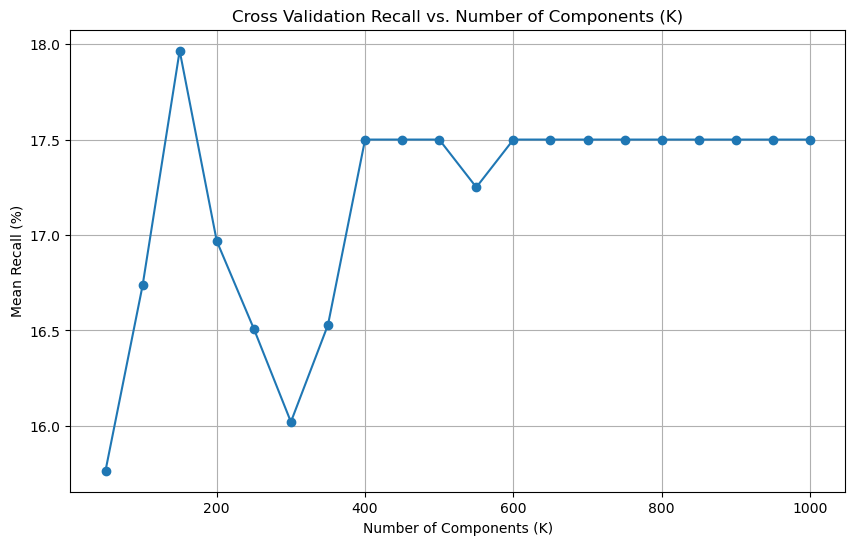

In [80]:
# Plotting the recalls for each K
plt.figure(figsize=(10, 6))
plt.plot(K_list, mean_recall_list, marker='o')
plt.title('Cross Validation Recall vs. Number of Components (K)')
plt.xlabel('Number of Components (K)')
plt.ylabel('Mean Recall (%)')
plt.grid(True)
plt.show()

##### Procedimiento, análisis y conclusiones:
Finalmente en un intento por mejorar el desempeño del modelo se utiliza crossvalidation para encontrar el mejor numero de componentes que maximiza el recall del modelo. <br>
Para esto se experimenta con 5 y 10 folds, obteniendo mejores resultados con el primero. En el primer caso se obtuvieron 150 componentes, con los cuales el recall en test coincidió con el obtenido en el punto 4.4 con 1000 componentes: 0.2679. El tiempo de computación fue de 333.25 segundos (5.55 min) En el segundo caso, con 10 folds, se obtuvo que el mejor numero de componentes es 200, y el recall obtenido en test es 0.2589 peor que con 5 folds. Además se tomó 694.58 segundos (11.57 minutos), casi el doble que en el primer caso.  <br>
Como se mencionó en el punto anterior el desbalanceo de clases afecta el recall que se obtiene para la clase positiva (Bush), pero lo que si se puede demostrar es que con 150 componentes se obtienen los mismos resultados que se obtuvieron con 1000 en la metrica de interés. <br>
Esto representa ahorros computacionales que en este caso pueden ser no significativos, pero si se tratara de mas datos, entonces la diferencia puede ser bastante. <br>
Por último se grafican los resultados obtenidos durante la validacion cruzada, y se observa como el recall tiene un primer pico en 150, desciende a 16, vuelve a aumentar  y despues de un leve descenso se queda en 17.5 a partir de los 600 componentes. Esto hace pensar que se debe ser muy cuidadoso al escoger el rango de K para la validación cruzada, o inclusive el salto entre valores a probar, pues si se hubiese escogido entre 200 y 1000, el resultado hubiese sido 400 componentes. O si se hubiese escogido un salto de 100 comenzando en 100, se hubiese omitido 150 componentes. <br>

References:
    https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html
    
        